# Analysis of Quality Air Data for AMB sensor in Bucaramanga

Loading libriries and sources...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore")

Loading data for stations... Data consist on two sheets=(CA,MET). First sheet is namelly "CA" an containes information about variables of particulate material for five stations (Acualago, Pilar, Girón, Normal, Caldas) where has been measure the folowing:

| Station | Variables | Nomenclature |
|:---|:---|:---|
| Parque Acualago - Floridablanca | PM$_{10}$, PM$_{2.5}$, NO$_2$, O$_3$ | A_PM10, A_PM25, A_NO2, A_O3 |
| Colegio Nuestra Sra del Pilar | PM$_{10}$, PM$_{2.5}$, NO$_2$, O$_3$ | P_PM10, P_PM25, P_NO2, P_O3 |
| Instituto Caldas | PM$_{10}$, PM$_{2.5}$ | C_PM10, C_PM25 |
| Colegio Normal Superior | PM$_{10}$, PM$_{2.5}$ | N_PM10, N_PM25 |
| Secretaría del Adulto Mayor - Girón | PM$_{10}$, PM$_{2.5}$ | G_PM10, G_PM25 |

while second sheet contain information about metereological data:

| Station | Variables | Nomenclature |
|:---|:---|:---|
| Parque Acualago - Floridablanca | Air Temperature (C degrees), Rain (mm), Relative Humidity (%), Wind Direction (degrees), Wind Speed (m/s), Solar Radiation (W/m2) | A_T, A_R, A_RH, A_WD, A_WS, A_SR |
| Colegio Nuestra Sra del Pilar | Air Temperature (C degrees), Rain (mm), Relative Humidity (%), Wind Direction (degrees), Wind Speed (m/s), Solar Radiation (W/m2) | P_T, P_R, P_RH, P_WD, P_WS, P_SR |
| Instituto Caldas | Air Temperature (C degrees), Rain (mm), Relative Humidity (%), Wind Direction (degrees), Wind Speed (m/s), Solar Radiation (W/m2) | C_T, C_R, C_RH, C_WD, C_WS, C_SR |
| Colegio Normal Superior | Air Temperature (C degrees), Rain (mm), Relative Humidity (%), Wind Direction (degrees), Wind Speed (m/s), Solar Radiation (W/m2) | N_T, N_R, N_RH, N_WD, N_WS, N_SR |
| Secretaría del Adulto Mayor - Girón | Air Temperature (C degrees), Relative Humidity (%), Wind Direction (degrees), Wind Speed (m/s), Solar Radiation (W/m2) | G_T, G_RH, G_WD, G_WS, G_SR |

In [2]:
col_names_CA=["datetime","A_PM10","A_PM25","A_NO2","A_O3","P_PM10","P_PM25","P_NO2","P_O3","G_PM10","G_PM25",
              "N_PM10","N_PM25","C_PM10","C_PM25"]
data_CA=pd.read_excel(r'DatosEstacionesAMB.xlsx',sheet_name='CA',skiprows=2,header=None)
data_CA.columns=col_names_CA
data_CA["datetime"]=pd.to_datetime(data_CA["datetime"],format='%Y-%m-%d %H:%M:%S',utc=True)
data_CA.head()

datetime  A_PM10  A_PM25   A_NO2    A_O3 P_PM10 P_PM25  \
0 2018-10-01 00:00:00+00:00  NoData  NoData  NoData  NoData   23.8   12.1   
1 2018-10-01 01:00:00+00:00  NoData  NoData  NoData  NoData   14.6    7.5   
2 2018-10-01 02:00:00+00:00  NoData  NoData  NoData  NoData   14.5    7.7   
3 2018-10-01 03:00:00+00:00  NoData  NoData  NoData  NoData   16.6    7.9   
4 2018-10-01 04:00:00+00:00  NoData  NoData  NoData  NoData   18.3    9.5   

     P_NO2  P_O3  G_PM10  G_PM25 N_PM10 N_PM25 C_PM10 C_PM25  
0  24.8688   3.4    13.5     5.6     13    6.4   10.2    4.9  
1   1.3188  17.5    12.7     5.5   13.8    6.4   14.7    7.4  
2  13.1880   7.2    16.2     6.6   13.2    6.7   13.4    6.5  
3  13.9416   NaN    16.3     6.7   12.4      6   11.7    6.1  
4   8.8548   3.6    15.1     5.7   16.1    7.3   16.7    8.2

In [3]:
col_names_MET=["datetime","A_T","A_R","A_RH","A_WD","A_WS","A_SR","P_T","P_R","P_RH","P_WD","P_WS","P_SR",
              "G_T","G_RH","G_WD","G_WS","G_SR","N_T","N_R","N_RH","N_WD","N_WS","N_SR","C_T","C_R","C_RH",
               "C_WD","C_WS","C_SR"]
data_MET=pd.read_excel(r'DatosEstacionesAMB.xlsx',sheet_name='MET',skiprows=2,header=None)
data_MET.columns=col_names_MET
data_MET["datetime"]=pd.to_datetime(data_MET["datetime"],format='%Y-%m-%d %H:%M:%S',utc=True)
data_MET.head()

datetime     A_T     A_R    A_RH    A_WD    A_WS    A_SR  \
0 2018-10-01 00:00:00+00:00  NoData  NoData  NoData  NoData  NoData  NoData   
1 2018-10-01 01:00:00+00:00  NoData  NoData  NoData  NoData  NoData  NoData   
2 2018-10-01 02:00:00+00:00  NoData  NoData  NoData  NoData  NoData  NoData   
3 2018-10-01 03:00:00+00:00  NoData  NoData  NoData  NoData  NoData  NoData   
4 2018-10-01 04:00:00+00:00  NoData  NoData  NoData  NoData  NoData  NoData   

      P_T     P_R    P_RH  ...  N_RH   N_WD N_WS N_SR   C_T  C_R  C_RH   C_WD  \
0  NoData  NoData  NoData  ...  80.2  126.2    1    0  22.2  0.1  83.5  290.6   
1  NoData  NoData  NoData  ...    88  124.6  1.1    0  21.7    0  89.8  109.9   
2  NoData  NoData  NoData  ...    87  134.8  1.1    0  21.7    0  86.8  350.4   
3  NoData  NoData  NoData  ...  83.1  140.6  0.8    0  21.6    0  84.9  258.3   
4  NoData  NoData  NoData  ...  90.8  177.5    1    0  20.7    0  91.7  170.6   

    C_WS C_SR  
0  <Samp    8  
1  <Samp    8  
2  <Samp    8  
3  <Samp    8  
4      1    8  

[5 rows x 30 columns]

Confirming if all datetimes are the same in both datasets

In [4]:
data_CA["datetime"]-data_MET["datetime"]

0      0 days
1      0 days
2      0 days
3      0 days
4      0 days
        ...  
8035   0 days
8036   0 days
8037   0 days
8038   0 days
8039   0 days
Name: datetime, Length: 8040, dtype: timedelta64[ns]

Putting datetime column as index

In [5]:
data_CA.set_index("datetime", inplace=True)
data_MET.set_index("datetime", inplace=True)
data_CA.head()

A_PM10  A_PM25   A_NO2    A_O3 P_PM10 P_PM25  \
datetime                                                                  
2018-10-01 00:00:00+00:00  NoData  NoData  NoData  NoData   23.8   12.1   
2018-10-01 01:00:00+00:00  NoData  NoData  NoData  NoData   14.6    7.5   
2018-10-01 02:00:00+00:00  NoData  NoData  NoData  NoData   14.5    7.7   
2018-10-01 03:00:00+00:00  NoData  NoData  NoData  NoData   16.6    7.9   
2018-10-01 04:00:00+00:00  NoData  NoData  NoData  NoData   18.3    9.5   

                             P_NO2  P_O3  G_PM10  G_PM25 N_PM10 N_PM25 C_PM10  \
datetime                                                                        
2018-10-01 00:00:00+00:00  24.8688   3.4    13.5     5.6     13    6.4   10.2   
2018-10-01 01:00:00+00:00   1.3188  17.5    12.7     5.5   13.8    6.4   14.7   
2018-10-01 02:00:00+00:00  13.1880   7.2    16.2     6.6   13.2    6.7   13.4   
2018-10-01 03:00:00+00:00  13.9416   NaN    16.3     6.7   12.4      6   11.7   
2018-10-01 04:00:00+00:00   8.8548   3.6    15.1     5.7   16.1    7.3   16.7   

                          C_PM25  
datetime                          
2018-10-01 00:00:00+00:00    4.9  
2018-10-01 01:00:00+00:00    7.4  
2018-10-01 02:00:00+00:00    6.5  
2018-10-01 03:00:00+00:00    6.1  
2018-10-01 04:00:00+00:00    8.2

## Some data statistics

In [6]:
t = PrettyTable(['Charateristic','CA data', 'MET data'])
t.add_row(['Lenght',len(data_CA),len(data_MET)])
t.add_row(['Variables',data_CA.shape[1]-1,data_MET.shape[1]-1])
t.add_row(['Start time',data_CA.index.min(),data_MET.index.min()])
t.add_row(['End time',data_CA.index.max(),data_MET.index.max()])
print(t)

+---------------+---------------------------+---------------------------+
| Charateristic |          CA data          |          MET data         |
+---------------+---------------------------+---------------------------+
|     Lenght    |            8040           |            8040           |
|   Variables   |             13            |             28            |
|   Start time  | 2018-10-01 00:00:00+00:00 | 2018-10-01 00:00:00+00:00 |
|    End time   | 2019-08-31 23:00:00+00:00 | 2019-08-31 23:00:00+00:00 |
+---------------+---------------------------+---------------------------+


Data contain string values (Not numeric). Replacing string values for NaN values. This values are not data or missing data.

In [7]:
for c in data_CA.columns:
    data_CA[c] = pd.to_numeric(data_CA[c], errors='coerce')
for c in data_MET.columns:
    data_MET[c] = pd.to_numeric(data_MET[c], errors='coerce')
data_CA.head()

A_PM10  A_PM25  A_NO2  A_O3  P_PM10  P_PM25  \
datetime                                                                 
2018-10-01 00:00:00+00:00     NaN     NaN    NaN   NaN    23.8    12.1   
2018-10-01 01:00:00+00:00     NaN     NaN    NaN   NaN    14.6     7.5   
2018-10-01 02:00:00+00:00     NaN     NaN    NaN   NaN    14.5     7.7   
2018-10-01 03:00:00+00:00     NaN     NaN    NaN   NaN    16.6     7.9   
2018-10-01 04:00:00+00:00     NaN     NaN    NaN   NaN    18.3     9.5   

                             P_NO2  P_O3  G_PM10  G_PM25  N_PM10  N_PM25  \
datetime                                                                   
2018-10-01 00:00:00+00:00  24.8688   3.4    13.5     5.6    13.0     6.4   
2018-10-01 01:00:00+00:00   1.3188  17.5    12.7     5.5    13.8     6.4   
2018-10-01 02:00:00+00:00  13.1880   7.2    16.2     6.6    13.2     6.7   
2018-10-01 03:00:00+00:00  13.9416   NaN    16.3     6.7    12.4     6.0   
2018-10-01 04:00:00+00:00   8.8548   3.6    15.1     5.7    16.1     7.3   

                           C_PM10  C_PM25  
datetime                                   
2018-10-01 00:00:00+00:00    10.2     4.9  
2018-10-01 01:00:00+00:00    14.7     7.4  
2018-10-01 02:00:00+00:00    13.4     6.5  
2018-10-01 03:00:00+00:00    11.7     6.1  
2018-10-01 04:00:00+00:00    16.7     8.2

## Ploting

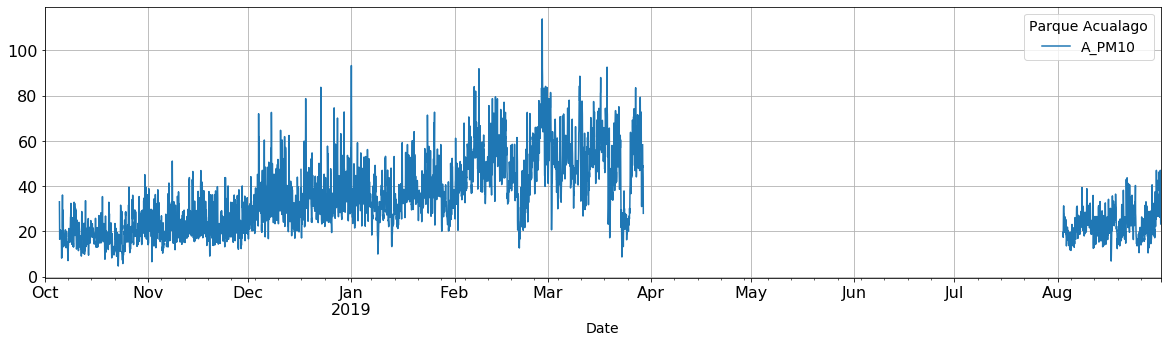

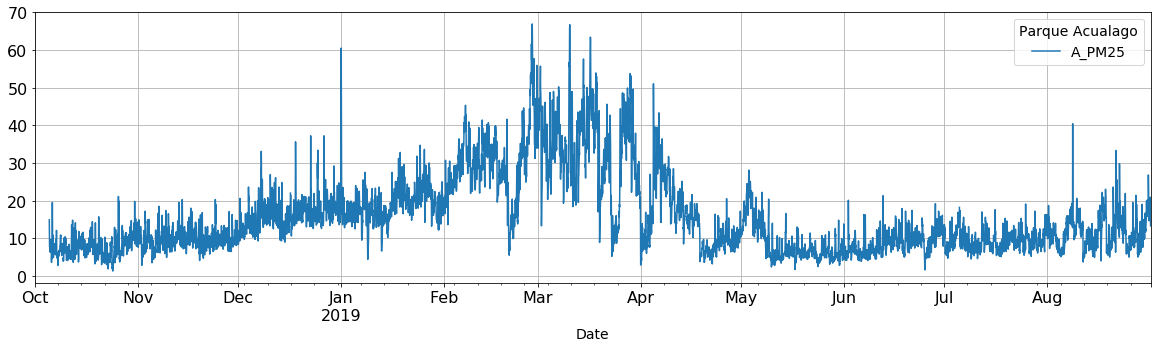

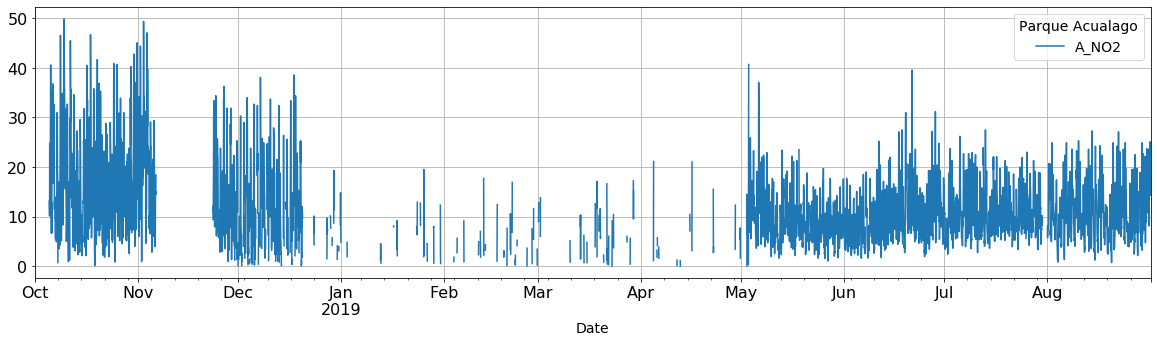

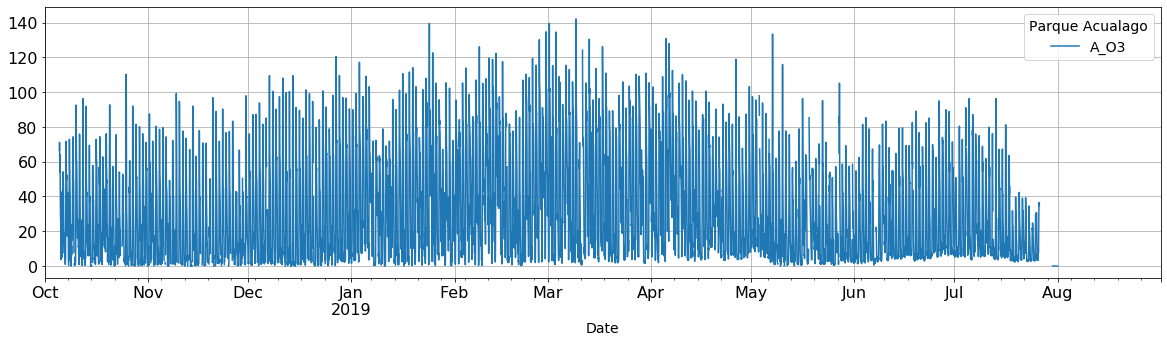

In [8]:
for i in col_names_CA[1:5]:
    plt.figure(figsize=(20,5))
    data_CA[i].plot(label=i)
    plt.legend(title="Parque Acualago",fontsize=14,title_fontsize=14)
    plt.xlabel("Date",fontsize=14)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid()
    plt.show()

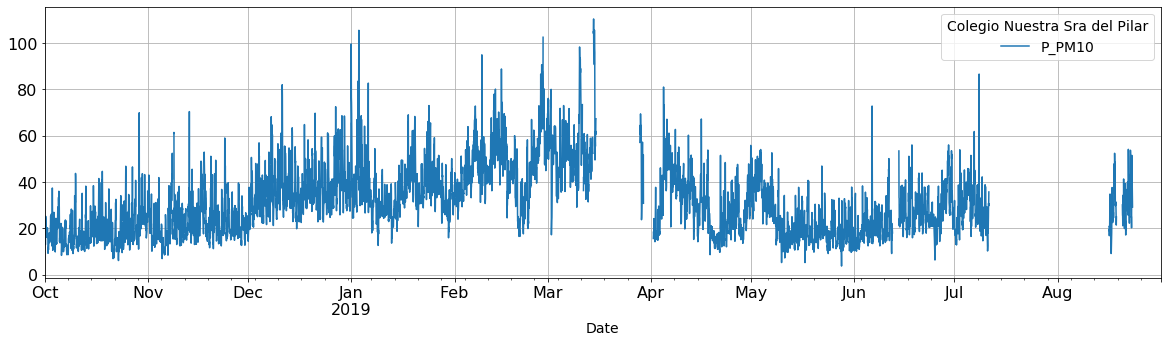

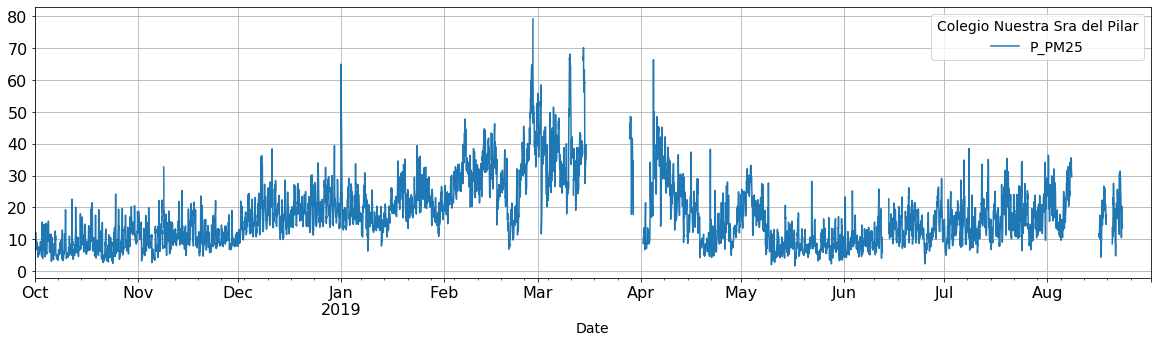

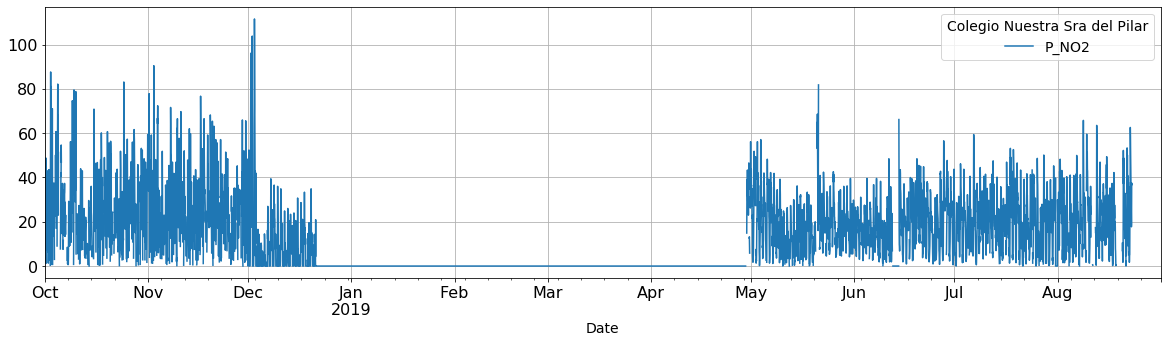

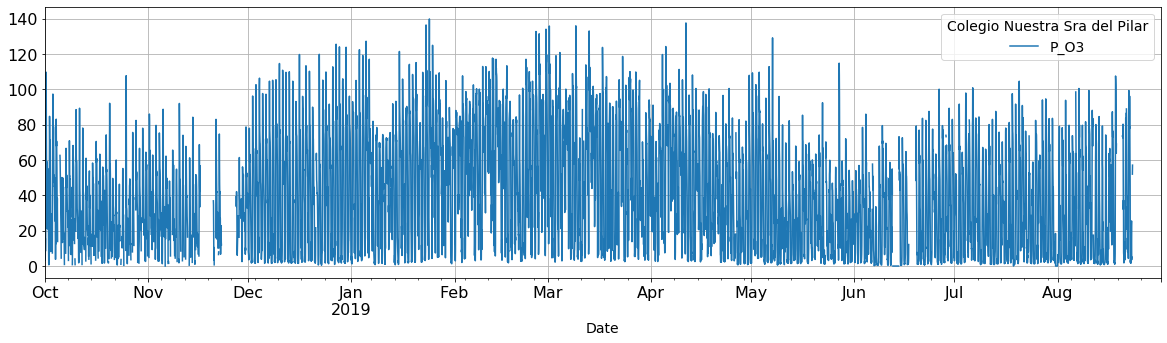

In [9]:
for i in col_names_CA[5:9]:
    plt.figure(figsize=(20,5))
    data_CA[i].plot(label=i)
    plt.legend(title="Colegio Nuestra Sra del Pilar",fontsize=14,title_fontsize=14)
    plt.xlabel("Date",fontsize=14)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid()
    plt.show()

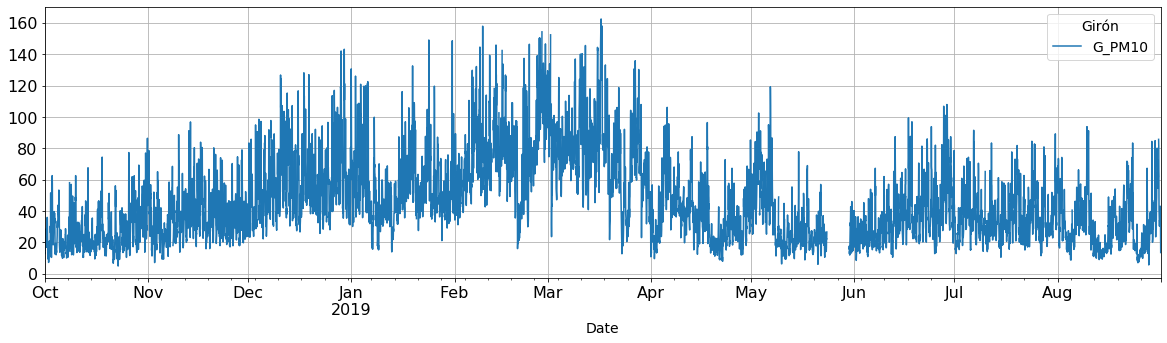

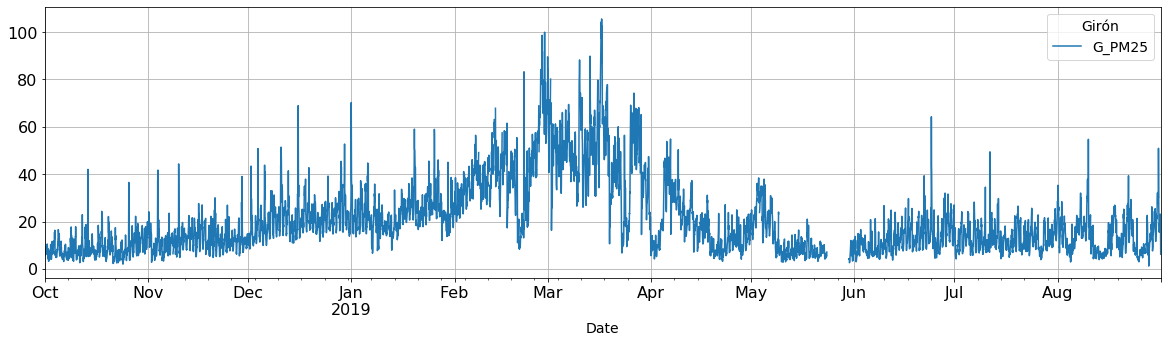

In [10]:
for i in col_names_CA[9:11]:
    plt.figure(figsize=(20,5))
    data_CA[i].plot(label=i)
    plt.legend(title="Girón",fontsize=14,title_fontsize=14)
    plt.xlabel("Date",fontsize=14)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid()
    plt.show()

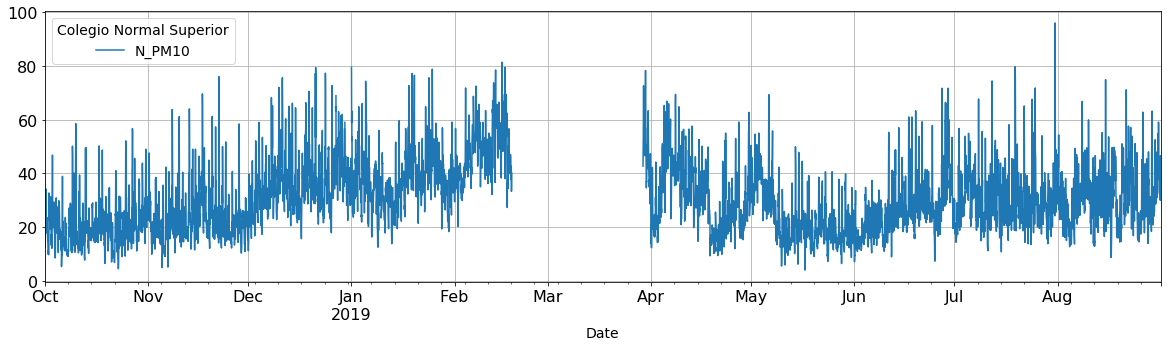

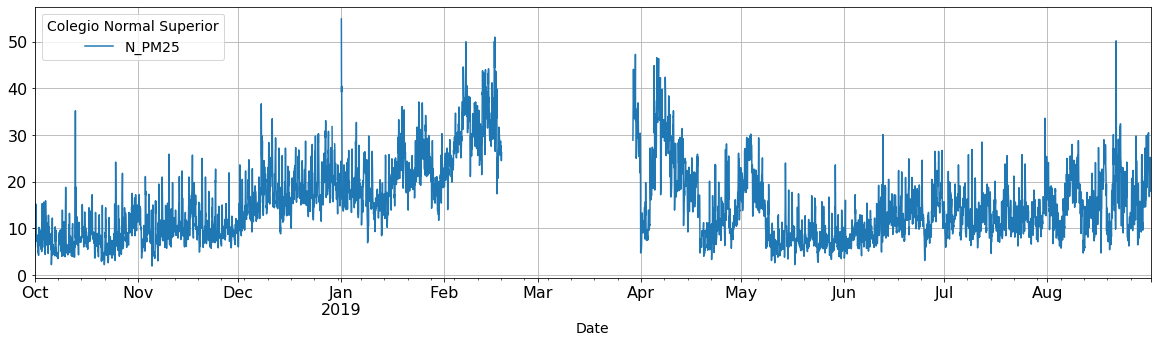

In [11]:
for i in col_names_CA[11:13]:
    plt.figure(figsize=(20,5))
    data_CA[i].plot(label=i)
    plt.legend(title="Colegio Normal Superior",fontsize=14,title_fontsize=14)
    plt.xlabel("Date",fontsize=14)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid()
    plt.show()

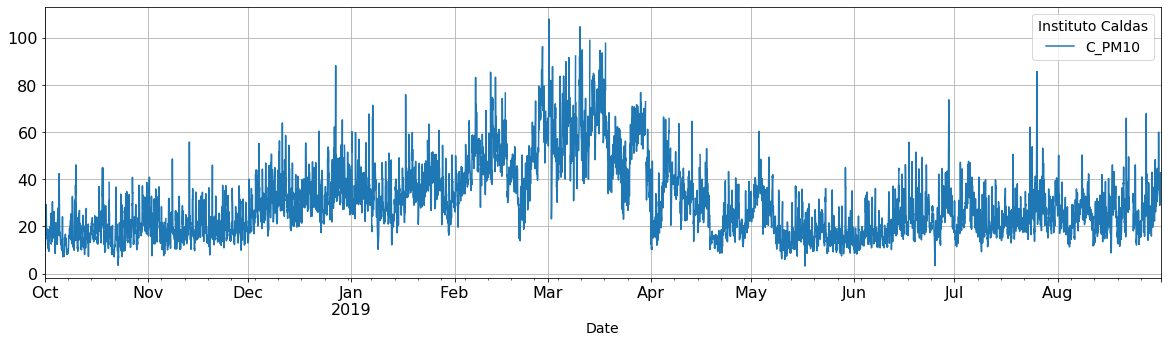

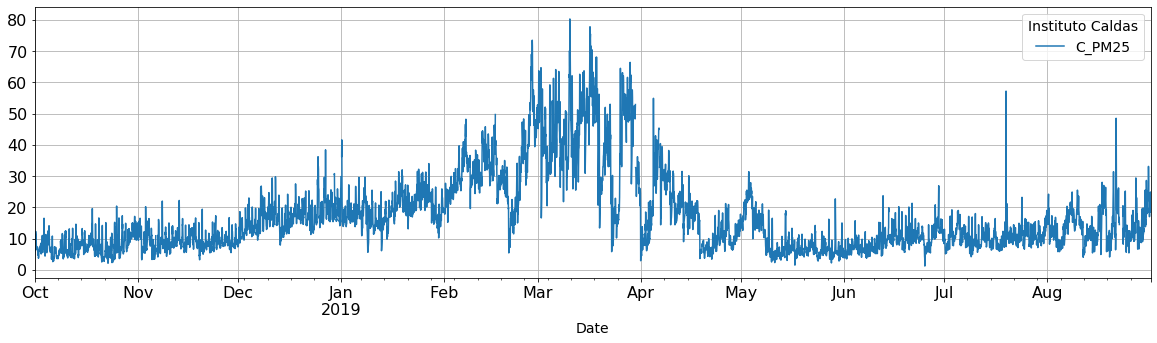

In [12]:
for i in col_names_CA[13:15]:
    plt.figure(figsize=(20,5))
    data_CA[i].plot(label=i)
    plt.legend(title="Instituto Caldas",fontsize=14,title_fontsize=14)
    plt.xlabel("Date",fontsize=14)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid()
    plt.show()

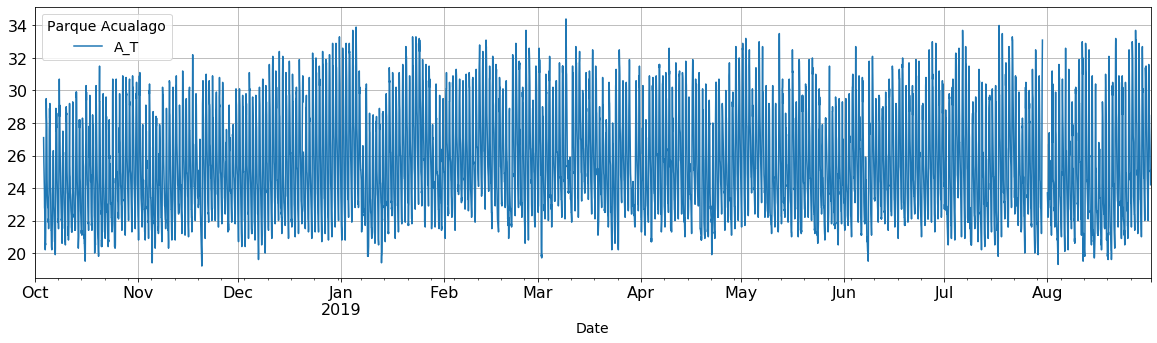

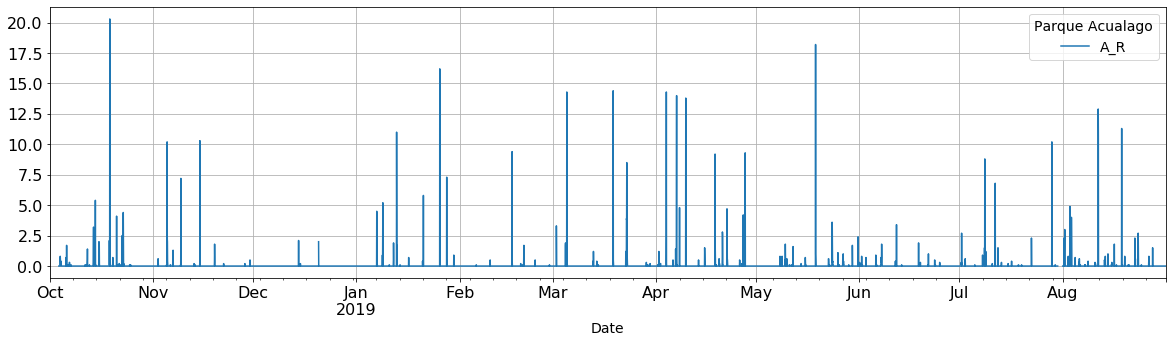

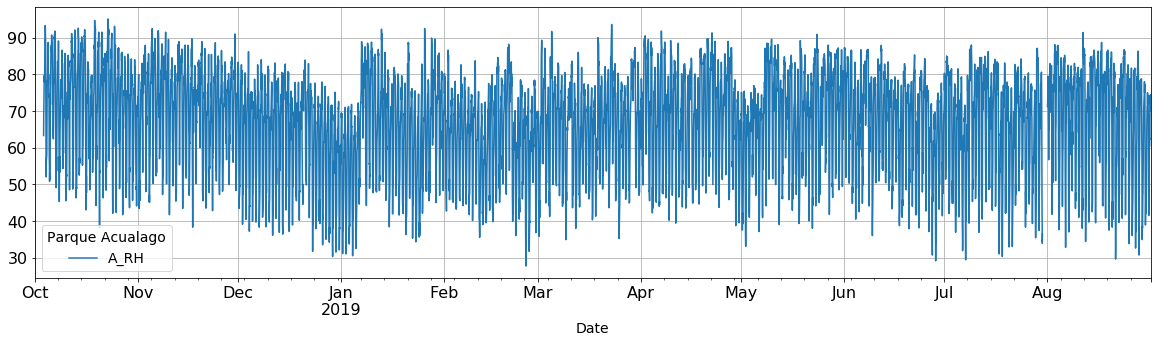

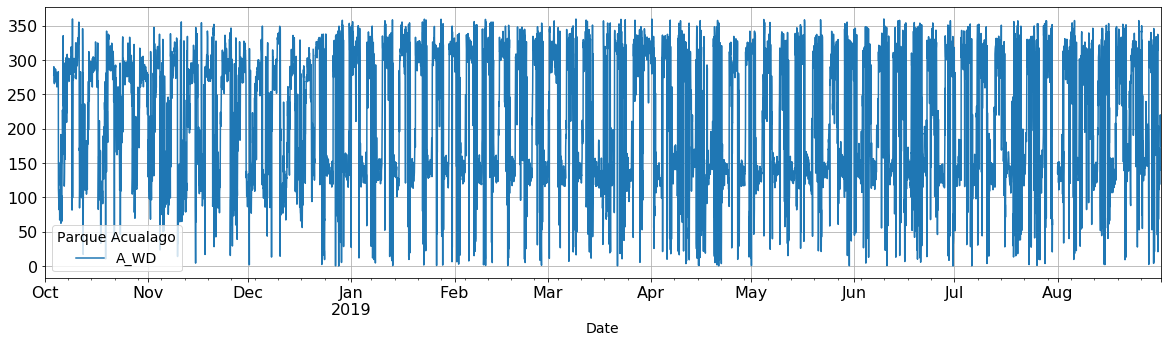

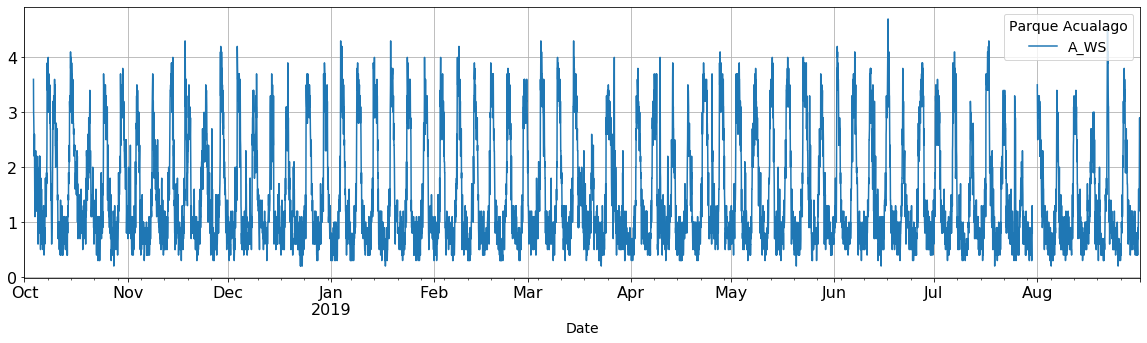

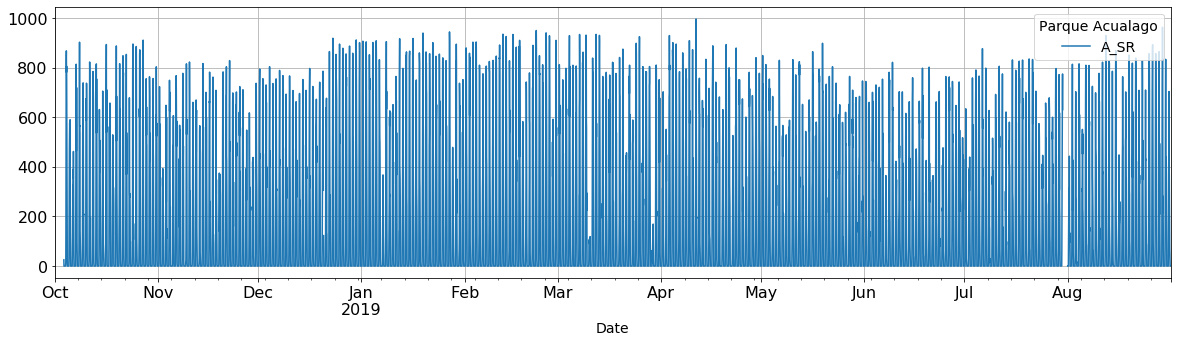

In [13]:
for i in col_names_MET[1:7]:
    plt.figure(figsize=(20,5))
    data_MET[i].plot(label=i)
    plt.legend(title="Parque Acualago",fontsize=14,title_fontsize=14)
    plt.xlabel("Date",fontsize=14)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid()
    plt.show()

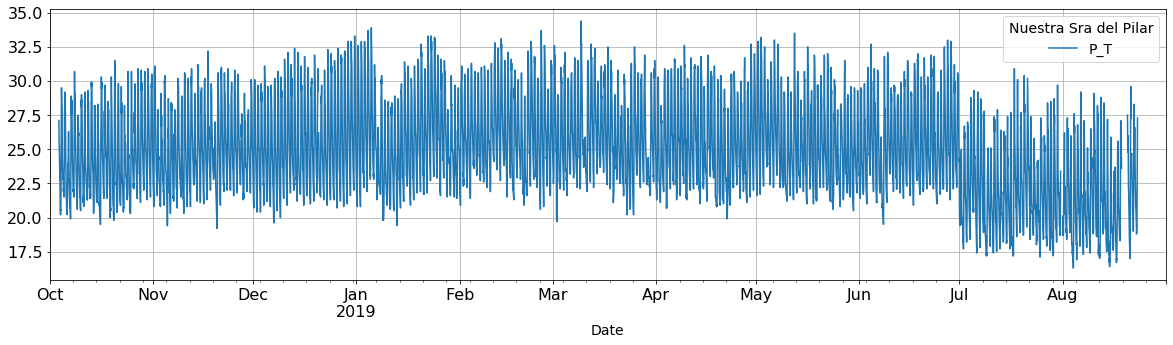

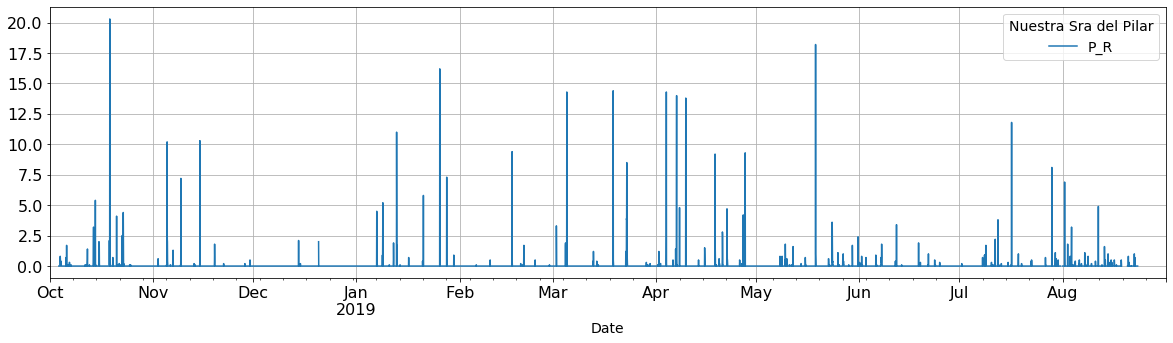

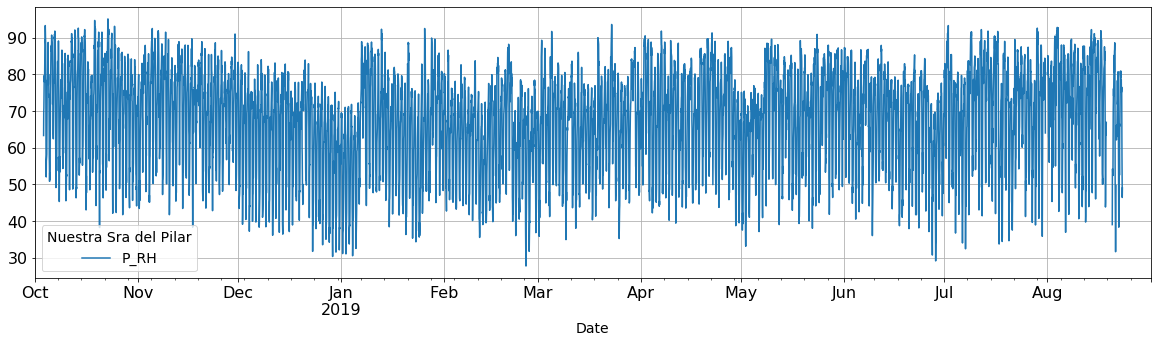

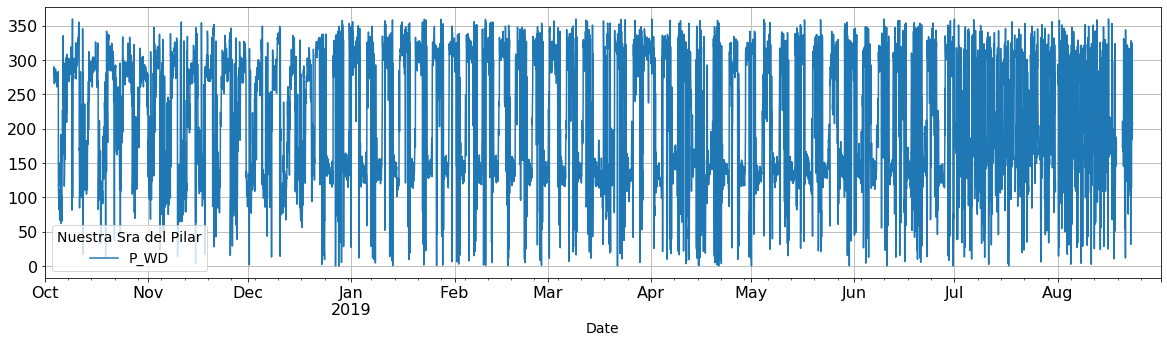

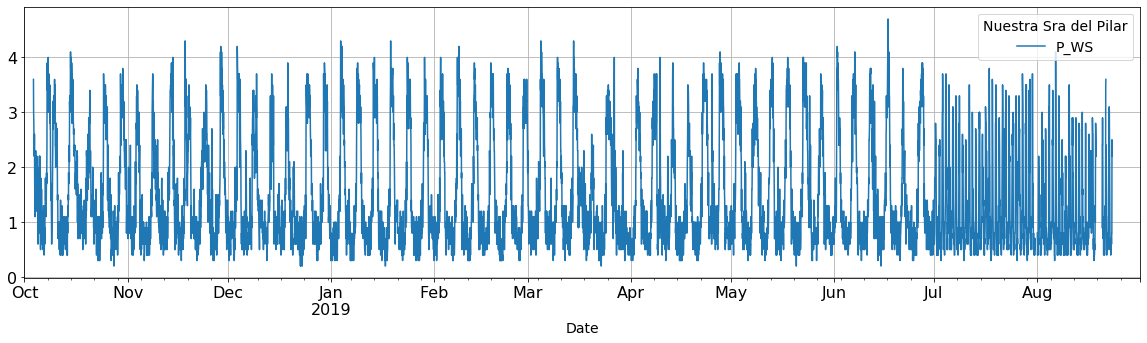

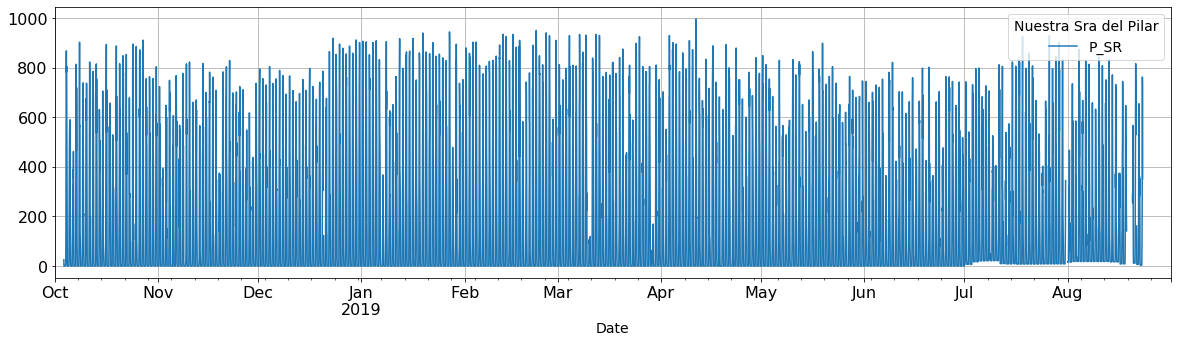

In [14]:
for i in col_names_MET[7:13]:
    plt.figure(figsize=(20,5))
    data_MET[i].plot(label=i)
    plt.legend(title="Nuestra Sra del Pilar",fontsize=14,title_fontsize=14)
    plt.xlabel("Date",fontsize=14)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid()
    plt.show()

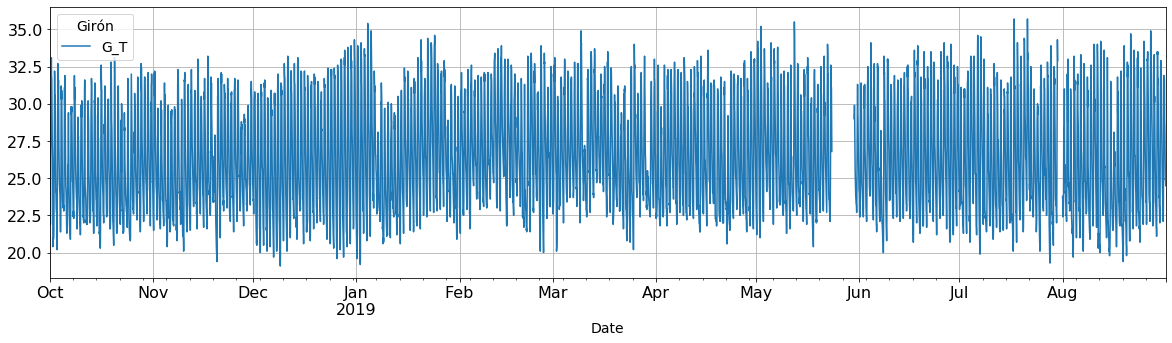

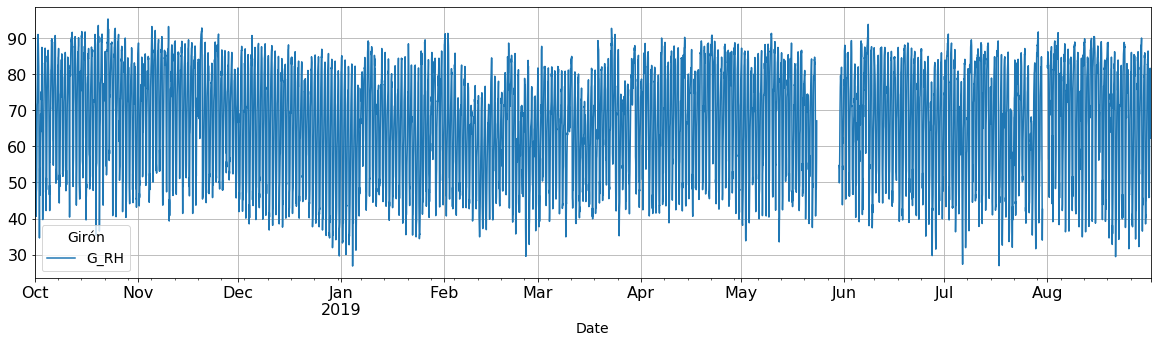

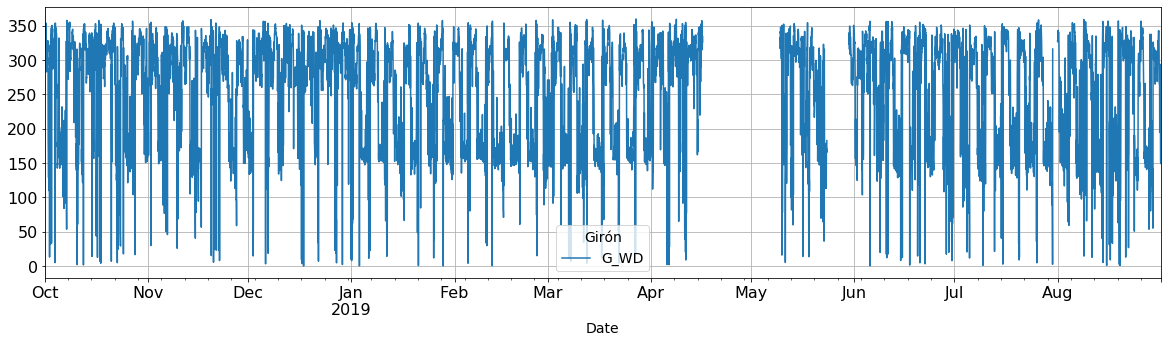

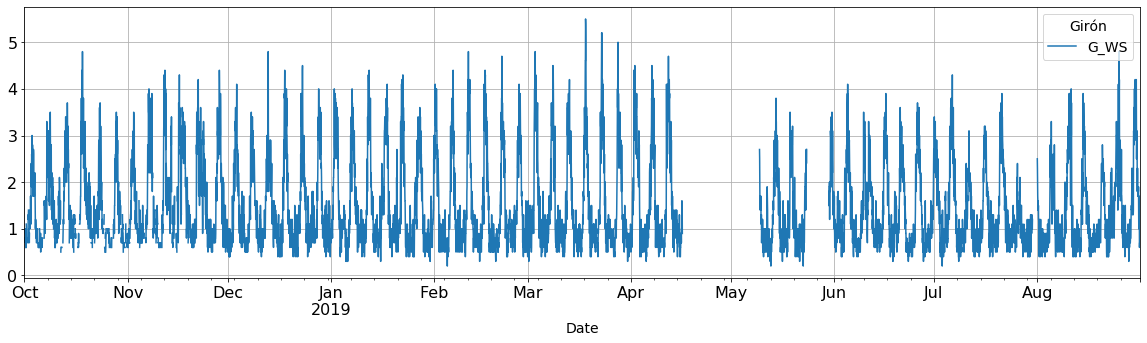

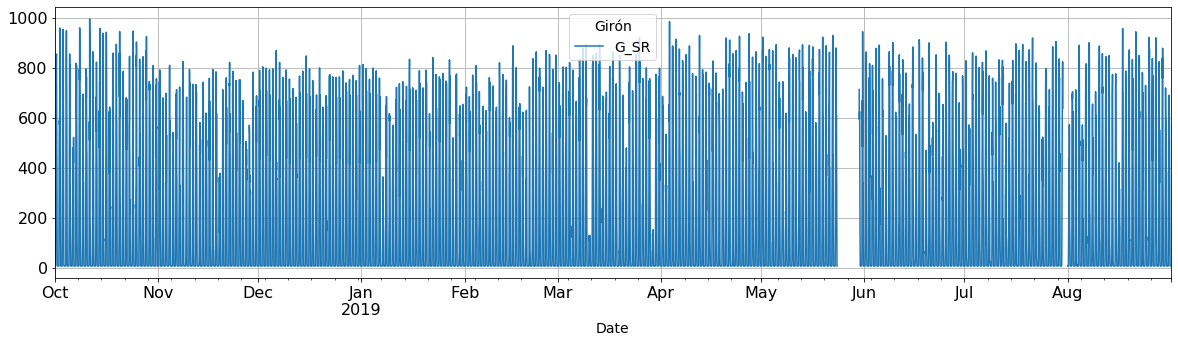

In [15]:
for i in col_names_MET[13:18]:
    plt.figure(figsize=(20,5))
    data_MET[i].plot(label=i)
    plt.legend(title="Girón",fontsize=14,title_fontsize=14)
    plt.xlabel("Date",fontsize=14)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid()
    plt.show()

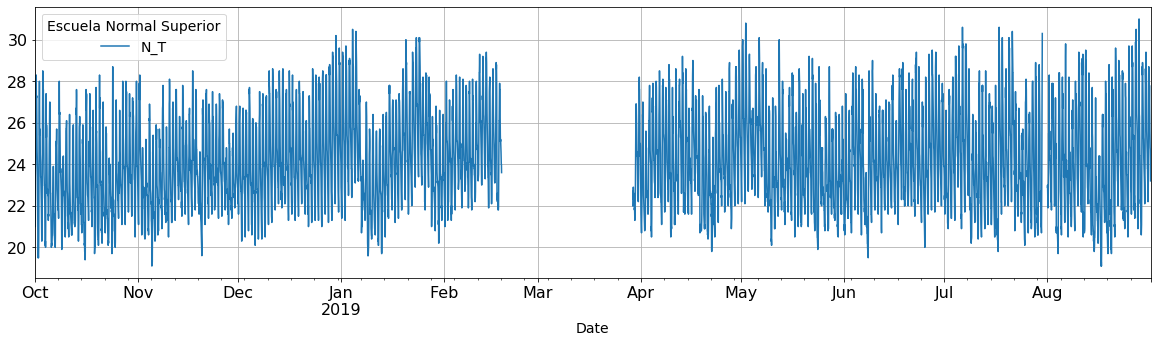

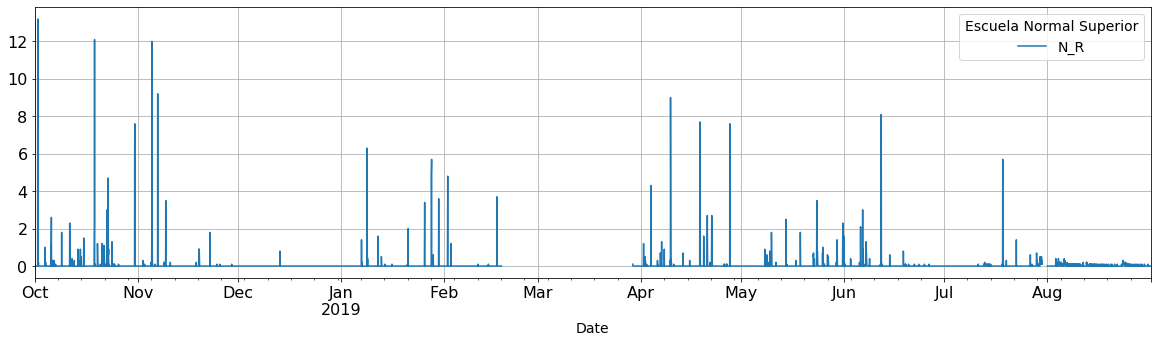

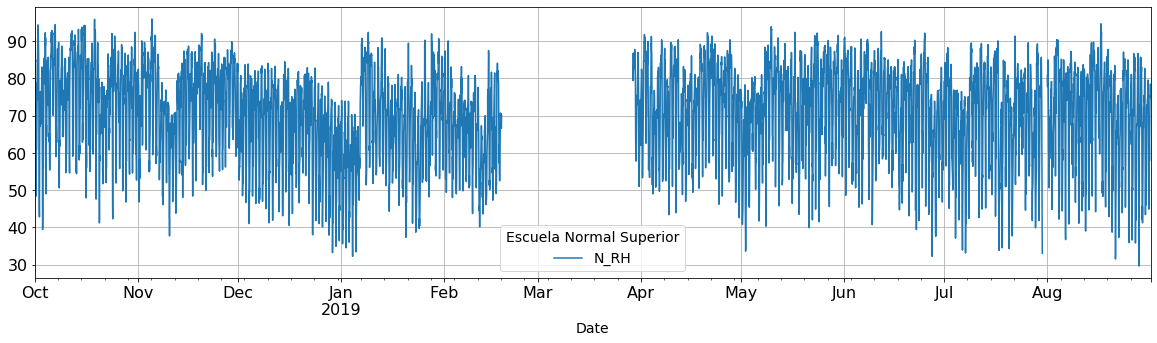

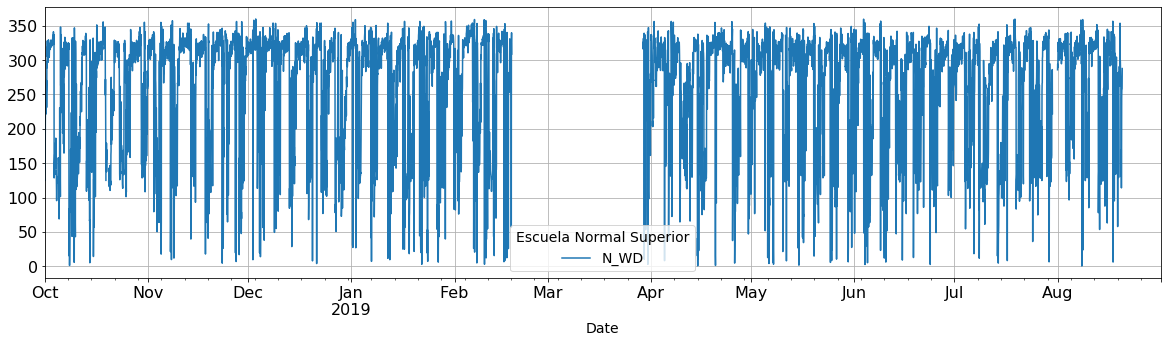

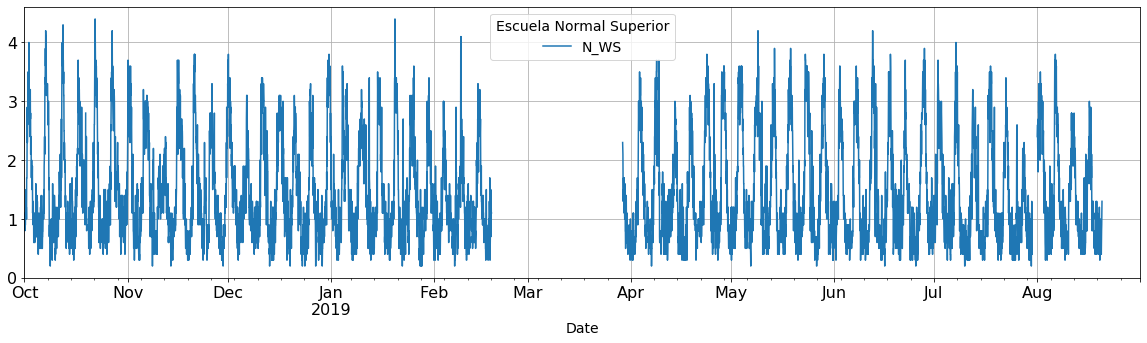

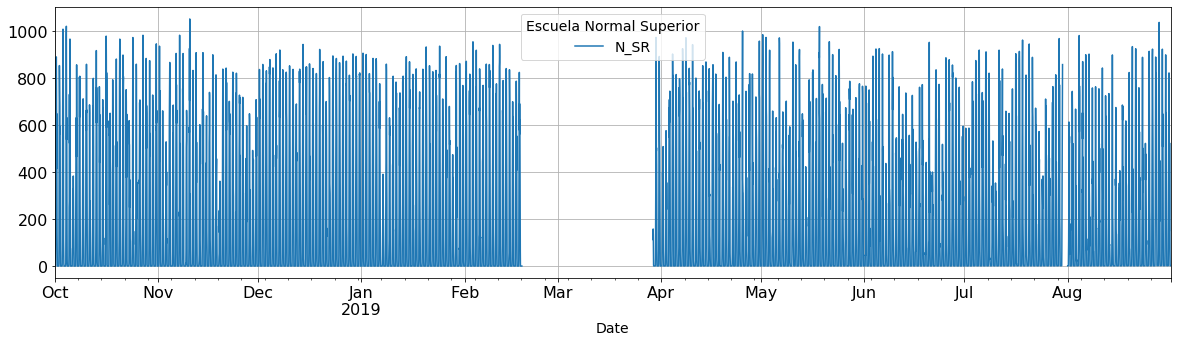

In [16]:
for i in col_names_MET[18:24]:
    plt.figure(figsize=(20,5))
    data_MET[i].plot(label=i)
    plt.legend(title="Escuela Normal Superior",fontsize=14,title_fontsize=14)
    plt.xlabel("Date",fontsize=14)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid()
    plt.show()

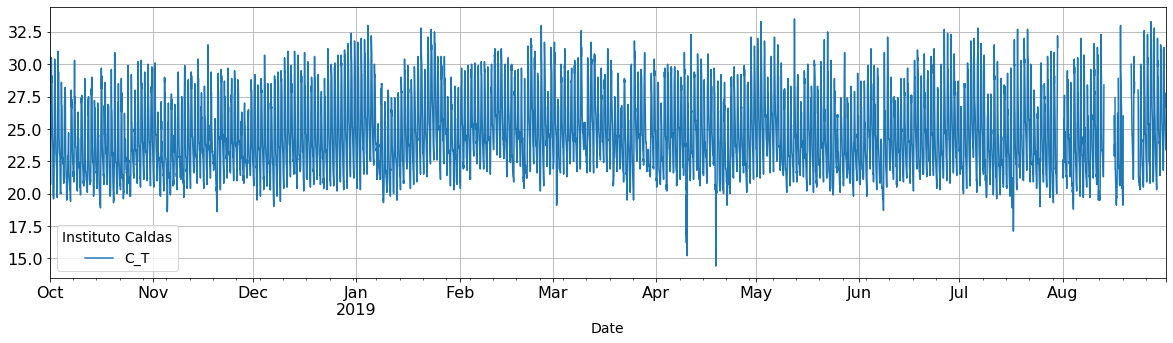

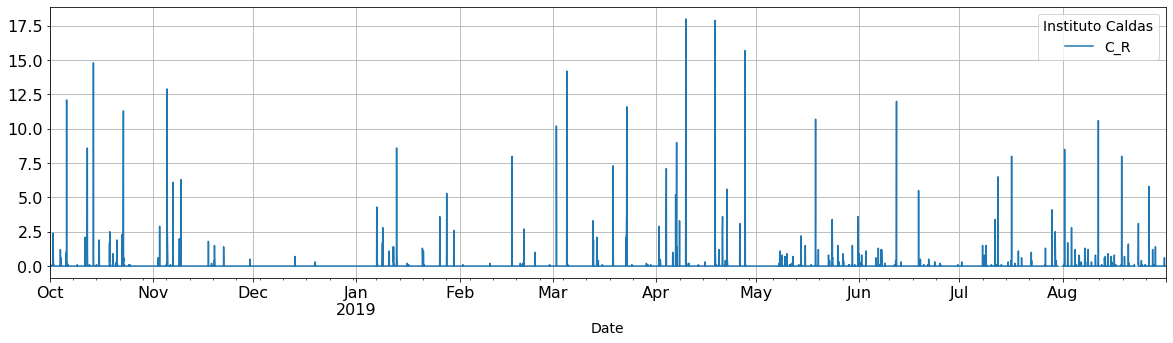

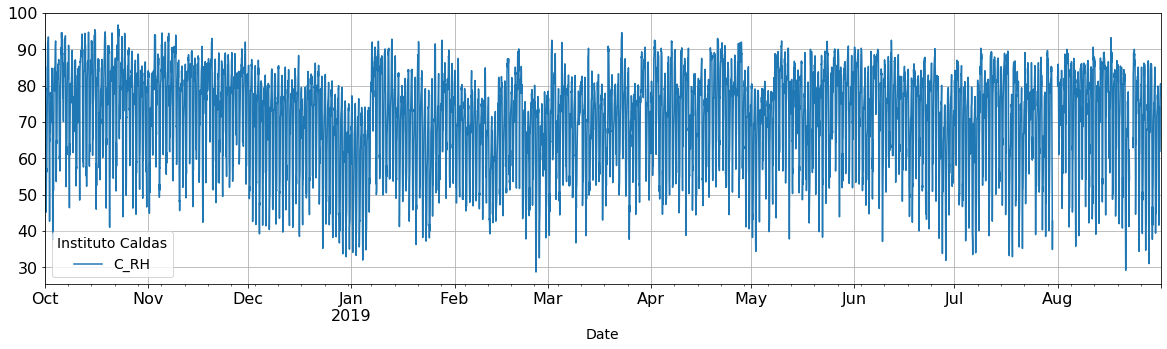

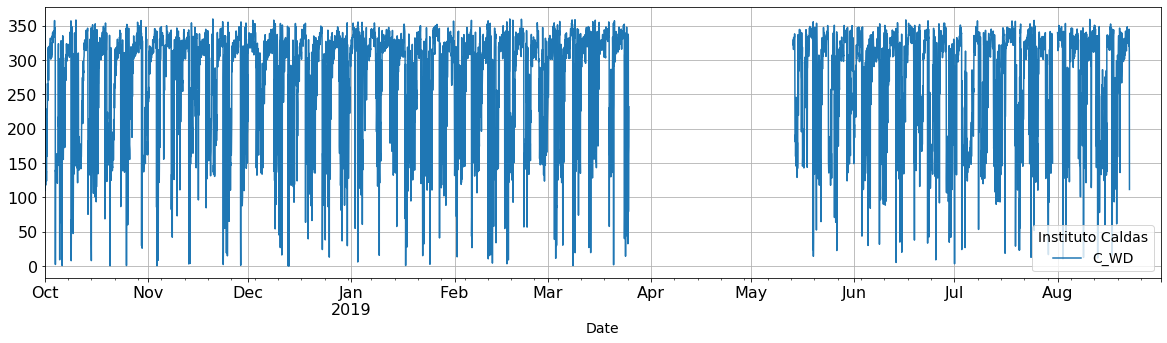

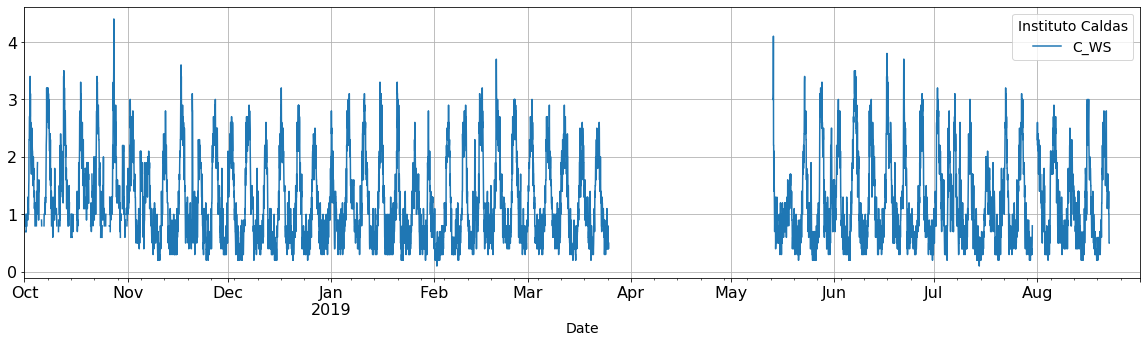

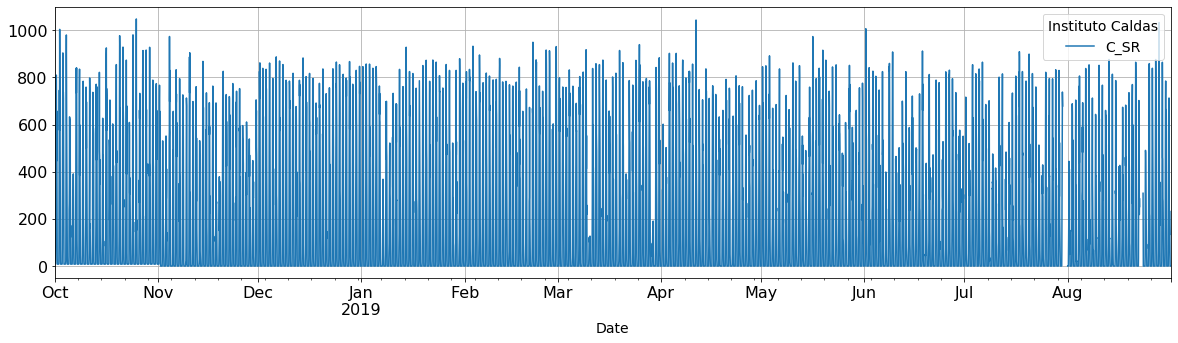

In [17]:
for i in col_names_MET[24:30]:
    plt.figure(figsize=(20,5))
    data_MET[i].plot(label=i)
    plt.legend(title="Instituto Caldas",fontsize=14,title_fontsize=14)
    plt.xlabel("Date",fontsize=14)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid()
    plt.show()

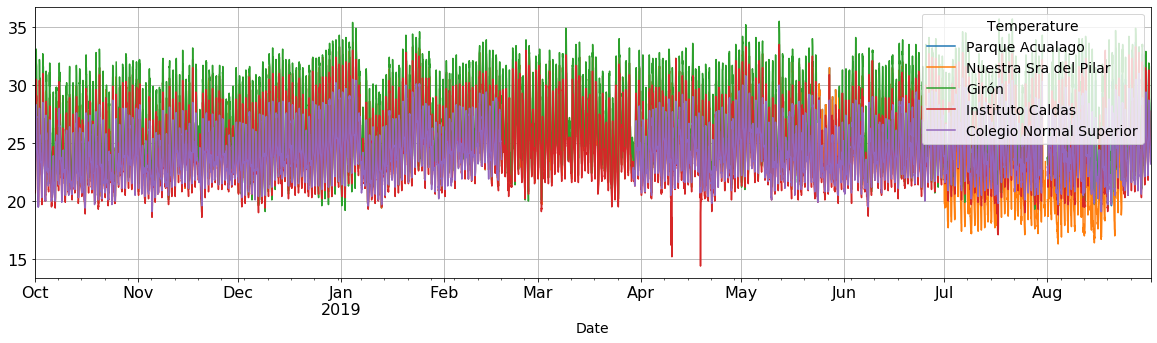

In [18]:
plt.figure(figsize=(20,5))
data_MET["A_T"].plot(label="Parque Acualago")
data_MET["P_T"].plot(label="Nuestra Sra del Pilar")
data_MET["G_T"].plot(label="Girón")
data_MET["C_T"].plot(label="Instituto Caldas")
data_MET["N_T"].plot(label="Colegio Normal Superior")
plt.legend(title="Temperature",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

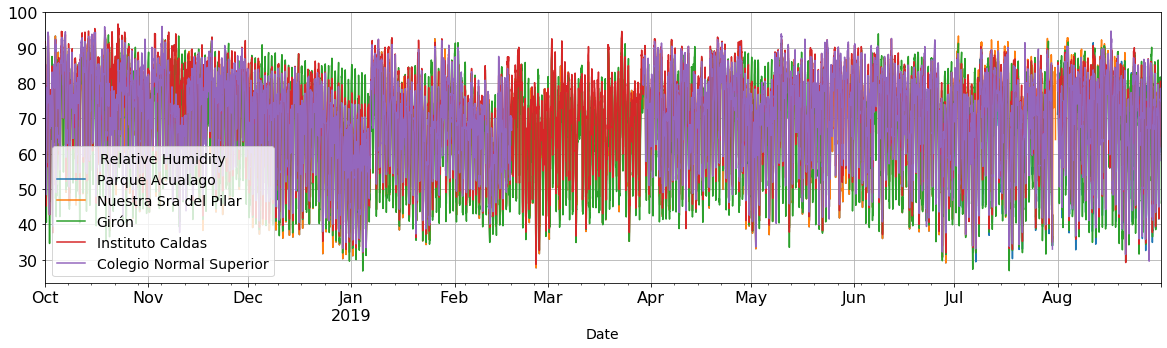

In [19]:
plt.figure(figsize=(20,5))
data_MET["A_RH"].plot(label="Parque Acualago")
data_MET["P_RH"].plot(label="Nuestra Sra del Pilar")
data_MET["G_RH"].plot(label="Girón")
data_MET["C_RH"].plot(label="Instituto Caldas")
data_MET["N_RH"].plot(label="Colegio Normal Superior")
plt.legend(title="Relative Humidity",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

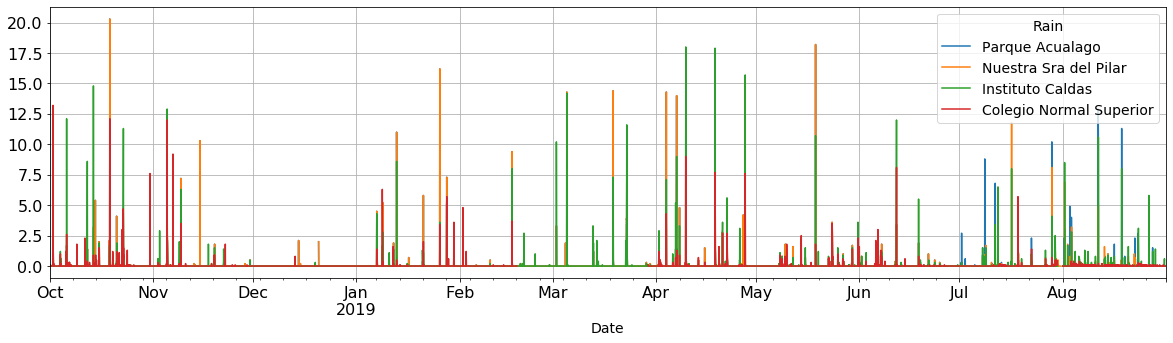

In [20]:
plt.figure(figsize=(20,5))
data_MET["A_R"].plot(label="Parque Acualago")
data_MET["P_R"].plot(label="Nuestra Sra del Pilar")
data_MET["C_R"].plot(label="Instituto Caldas")
data_MET["N_R"].plot(label="Colegio Normal Superior")
plt.legend(title="Rain",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

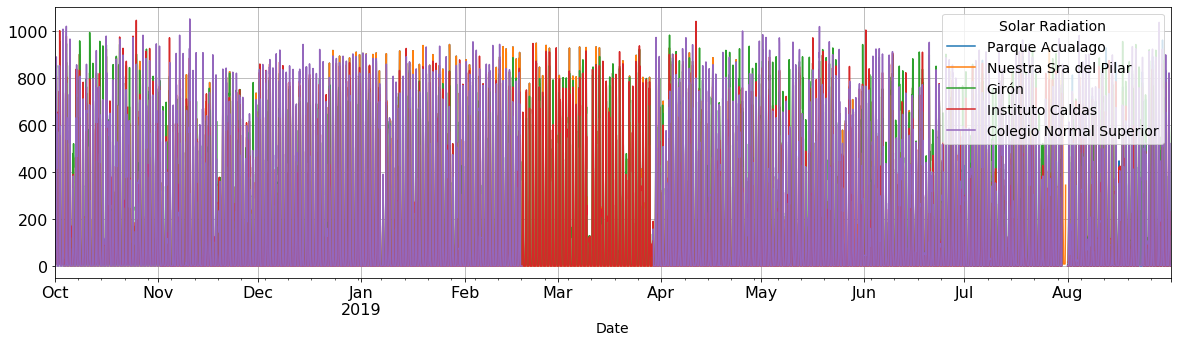

In [21]:
plt.figure(figsize=(20,5))
data_MET["A_SR"].plot(label="Parque Acualago")
data_MET["P_SR"].plot(label="Nuestra Sra del Pilar")
data_MET["G_SR"].plot(label="Girón")
data_MET["C_SR"].plot(label="Instituto Caldas")
data_MET["N_SR"].plot(label="Colegio Normal Superior")
plt.legend(title="Solar Radiation",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

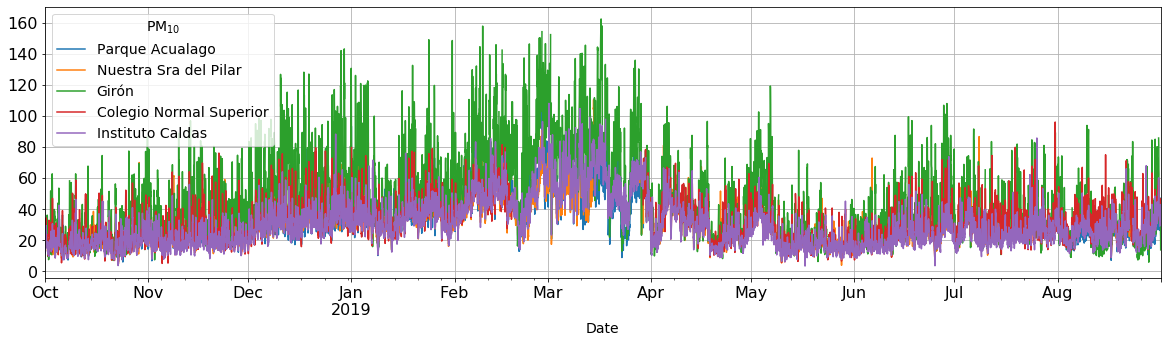

In [22]:
plt.figure(figsize=(20,5))
data_CA["A_PM10"].plot(label="Parque Acualago")
data_CA["P_PM10"].plot(label="Nuestra Sra del Pilar")
data_CA["G_PM10"].plot(label="Girón")
data_CA["N_PM10"].plot(label="Colegio Normal Superior")
data_CA["C_PM10"].plot(label="Instituto Caldas")
plt.legend(title=r"PM$_{10}$",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

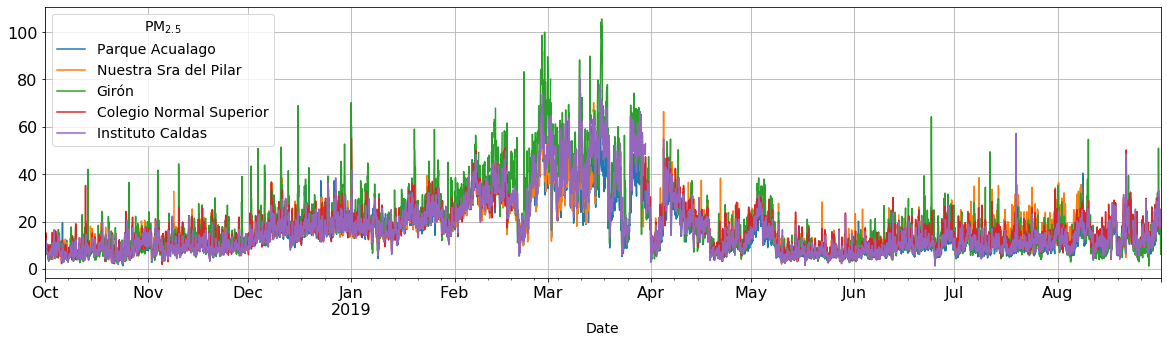

In [23]:
plt.figure(figsize=(20,5))
data_CA["A_PM25"].plot(label="Parque Acualago")
data_CA["P_PM25"].plot(label="Nuestra Sra del Pilar")
data_CA["G_PM25"].plot(label="Girón")
data_CA["N_PM25"].plot(label="Colegio Normal Superior")
data_CA["C_PM25"].plot(label="Instituto Caldas")
plt.legend(title=r"PM$_{2.5}$",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

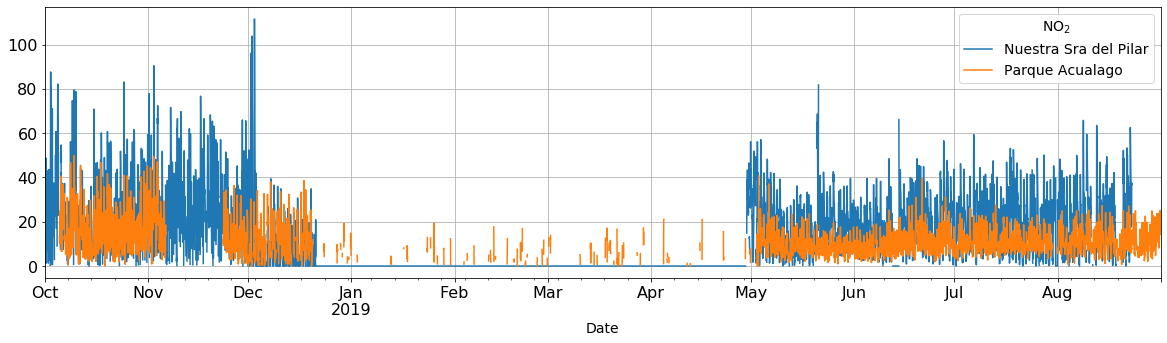

In [24]:
plt.figure(figsize=(20,5))
data_CA["P_NO2"].plot(label="Nuestra Sra del Pilar")
data_CA["A_NO2"].plot(label="Parque Acualago")
plt.legend(title=r"NO$_{2}$",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

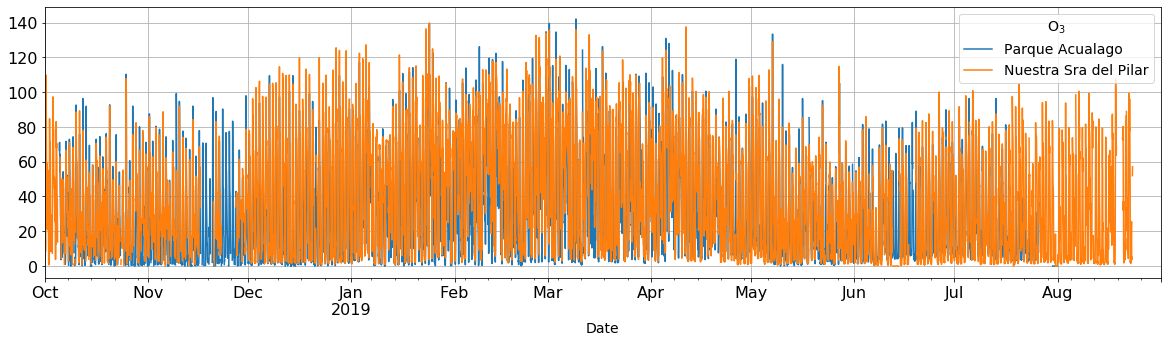

In [25]:
plt.figure(figsize=(20,5))
data_CA["A_O3"].plot(label="Parque Acualago")
data_CA["P_O3"].plot(label="Nuestra Sra del Pilar")
plt.legend(title=r"O$_{3}$",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

Ahora vamos a trababajar con datos diarios...

In [26]:
data_CA_d=data_CA.groupby(data_CA.index.floor('d')).mean().reset_index()
data_CA_d.set_index("datetime", inplace=True)
data_MET_d=data_MET.groupby(data_MET.index.floor('d')).mean().reset_index()
data_MET_d.set_index("datetime", inplace=True)
data_CA_d

A_PM10     A_PM25      A_NO2       A_O3  \
datetime                                                                
2018-10-01 00:00:00+00:00        NaN        NaN        NaN        NaN   
2018-10-02 00:00:00+00:00        NaN        NaN        NaN        NaN   
2018-10-03 00:00:00+00:00        NaN        NaN        NaN        NaN   
2018-10-04 00:00:00+00:00        NaN        NaN        NaN        NaN   
2018-10-05 00:00:00+00:00  20.371429   8.392857  21.185714  40.242857   
...                              ...        ...        ...        ...   
2019-08-27 00:00:00+00:00  24.125000  12.691667   9.937500        NaN   
2019-08-28 00:00:00+00:00  19.887500   8.666667  10.168421        NaN   
2019-08-29 00:00:00+00:00  23.087500  10.416667  11.125000        NaN   
2019-08-30 00:00:00+00:00  29.579167  14.183333  12.916667        NaN   
2019-08-31 00:00:00+00:00  33.321739  18.366667  15.312500        NaN   

                              P_PM10    P_PM25      P_NO2       P_O3  \
datetime                                                               
2018-10-01 00:00:00+00:00  18.279167  8.575000  21.195000  40.331818   
2018-10-02 00:00:00+00:00  16.637500  6.487500  28.335360  38.083333   
2018-10-03 00:00:00+00:00  19.954167  8.675000  21.188720  49.643478   
2018-10-04 00:00:00+00:00  17.620833  8.329167  41.125029  40.147826   
2018-10-05 00:00:00+00:00  21.666667  9.570833  37.731382  35.154545   
...                              ...       ...        ...        ...   
2019-08-27 00:00:00+00:00        NaN       NaN        NaN        NaN   
2019-08-28 00:00:00+00:00        NaN       NaN        NaN        NaN   
2019-08-29 00:00:00+00:00        NaN       NaN        NaN        NaN   
2019-08-30 00:00:00+00:00        NaN       NaN        NaN        NaN   
2019-08-31 00:00:00+00:00        NaN       NaN        NaN        NaN   

                              G_PM10     G_PM25     N_PM10     N_PM25  \
datetime                                                                
2018-10-01 00:00:00+00:00  21.433333   7.508333  19.762500   8.333333   
2018-10-02 00:00:00+00:00  17.183333   5.275000  19.729167   6.854167   
2018-10-03 00:00:00+00:00  30.295833   8.979167  23.558333   9.212500   
2018-10-04 00:00:00+00:00  21.100000   7.487500  20.291667   8.683333   
2018-10-05 00:00:00+00:00  29.700000   9.841667  19.833333   8.070833   
...                              ...        ...        ...        ...   
2019-08-27 00:00:00+00:00  25.466667  10.800000  30.275000  16.879167   
2019-08-28 00:00:00+00:00  23.716667  10.058333  25.266667  11.879167   
2019-08-29 00:00:00+00:00  35.845833  15.370833  32.145833  15.029167   
2019-08-30 00:00:00+00:00  48.982609  20.129167  35.554167  19.283333   
2019-08-31 00:00:00+00:00  47.634783  24.012500  41.112500  22.887500   

                              C_PM10     C_PM25  
datetime                                         
2018-10-01 00:00:00+00:00  17.070833   7.683333  
2018-10-02 00:00:00+00:00  15.929167   5.966667  
2018-10-03 00:00:00+00:00  19.995833   8.520833  
2018-10-04 00:00:00+00:00  16.404167   7.362500  
2018-10-05 00:00:00+00:00  19.787500   8.345833  
...                              ...        ...  
2019-08-27 00:00:00+00:00  31.416667  15.279167  
2019-08-28 00:00:00+00:00  22.650000  10.470833  
2019-08-29 00:00:00+00:00  25.666667  12.200000  
2019-08-30 00:00:00+00:00  34.412500  18.666667  
2019-08-31 00:00:00+00:00  37.979167  22.120833  

[335 rows x 14 columns]

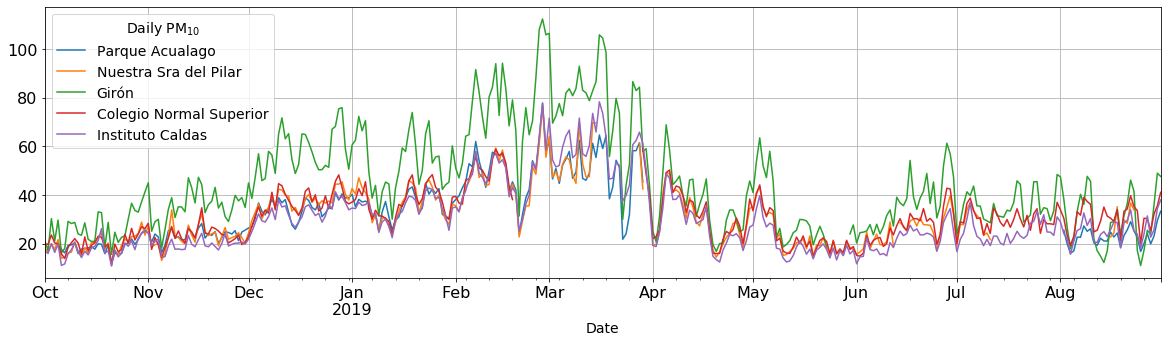

In [27]:
plt.figure(figsize=(20,5))
data_CA_d["A_PM10"].plot(label="Parque Acualago")
data_CA_d["P_PM10"].plot(label="Nuestra Sra del Pilar")
data_CA_d["G_PM10"].plot(label="Girón")
data_CA_d["N_PM10"].plot(label="Colegio Normal Superior")
data_CA_d["C_PM10"].plot(label="Instituto Caldas")
plt.legend(title=r"Daily PM$_{10}$",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

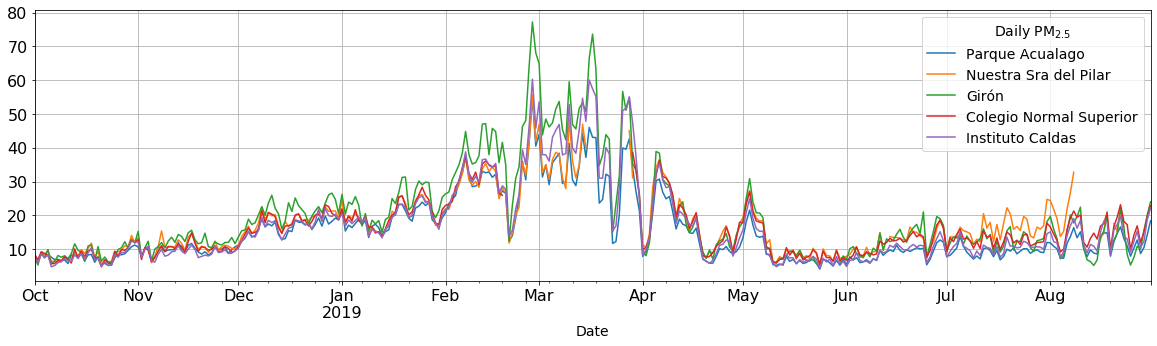

In [28]:
plt.figure(figsize=(20,5))
data_CA_d["A_PM25"].plot(label="Parque Acualago")
data_CA_d["P_PM25"].plot(label="Nuestra Sra del Pilar")
data_CA_d["G_PM25"].plot(label="Girón")
data_CA_d["N_PM25"].plot(label="Colegio Normal Superior")
data_CA_d["C_PM25"].plot(label="Instituto Caldas")
plt.legend(title=r"Daily PM$_{2.5}$",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

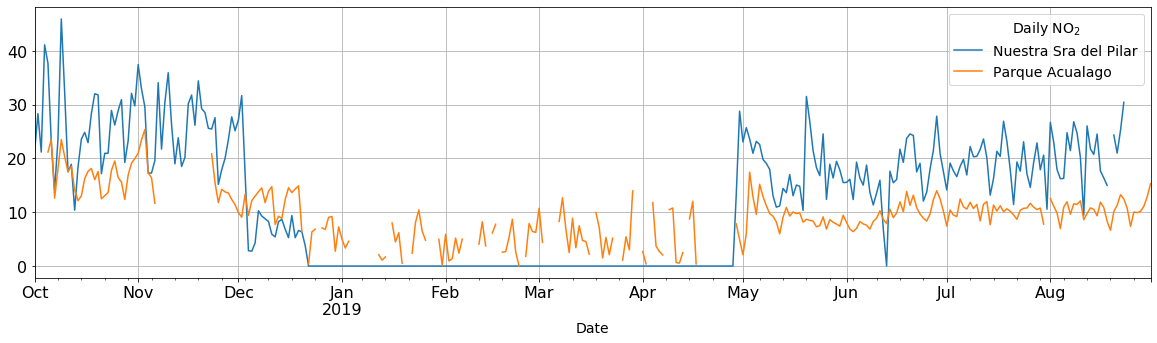

In [29]:
plt.figure(figsize=(20,5))
data_CA_d["P_NO2"].plot(label="Nuestra Sra del Pilar")
data_CA_d["A_NO2"].plot(label="Parque Acualago")
plt.legend(title=r"Daily NO$_{2}$",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

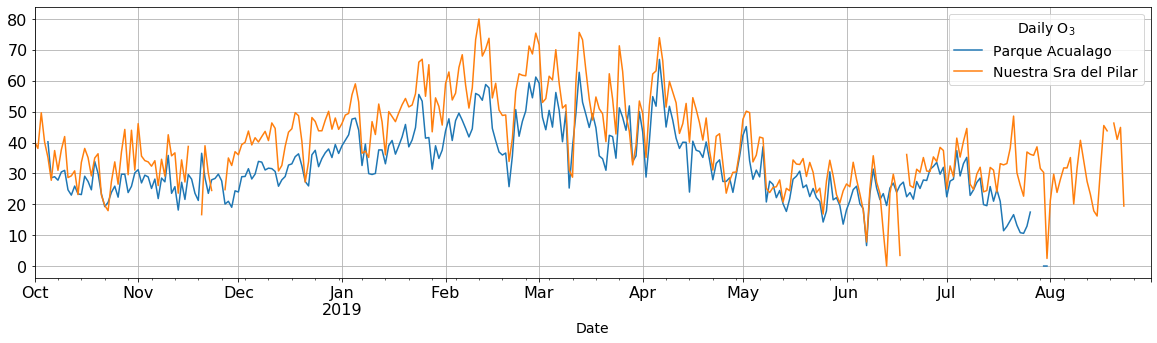

In [30]:
plt.figure(figsize=(20,5))
data_CA_d["A_O3"].plot(label="Parque Acualago")
data_CA_d["P_O3"].plot(label="Nuestra Sra del Pilar")
plt.legend(title=r"Daily O$_{3}$",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

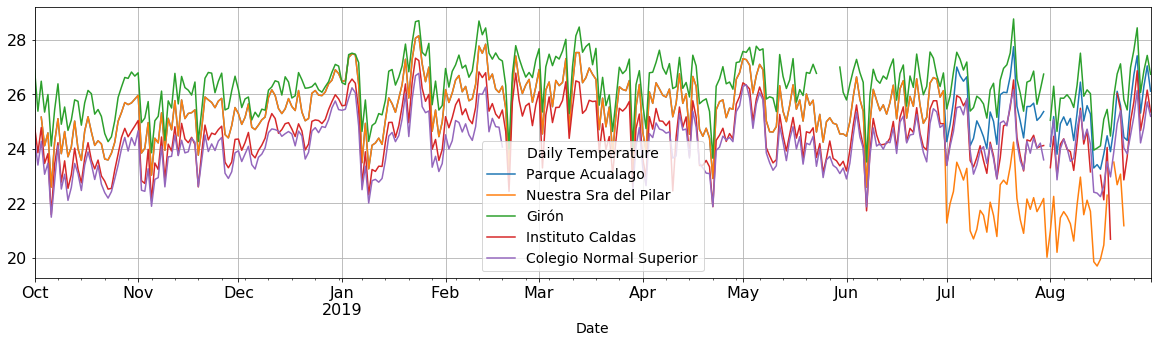

In [31]:
plt.figure(figsize=(20,5))
data_MET_d["A_T"].plot(label="Parque Acualago")
data_MET_d["P_T"].plot(label="Nuestra Sra del Pilar")
data_MET_d["G_T"].plot(label="Girón")
data_MET_d["C_T"].plot(label="Instituto Caldas")
data_MET_d["N_T"].plot(label="Colegio Normal Superior")
plt.legend(title="Daily Temperature",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

In [42]:
data_CA_s=data_CA.rolling(100,center=True,min_periods=10).mean()#.ewm(com=200, ignore_na=False).mean()
data_MET_s=data_MET.rolling(100,center=True,min_periods=10).mean()#.ewm(com=150, ignore_na=True).mean()

data_CA_s.head()

A_PM10  A_PM25  A_NO2  A_O3     P_PM10    P_PM25  \
datetime                                                                      
2018-10-01 00:00:00+00:00     NaN     NaN    NaN   NaN  17.740000  7.580000   
2018-10-01 01:00:00+00:00     NaN     NaN    NaN   NaN  17.670588  7.531373   
2018-10-01 02:00:00+00:00     NaN     NaN    NaN   NaN  17.569231  7.476923   
2018-10-01 03:00:00+00:00     NaN     NaN    NaN   NaN  17.492453  7.435849   
2018-10-01 04:00:00+00:00     NaN     NaN    NaN   NaN  17.479630  7.433333   

                               P_NO2       P_O3     G_PM10    G_PM25  \
datetime                                                               
2018-10-01 00:00:00+00:00  24.539100  38.570833  18.970000  6.306000   
2018-10-01 01:00:00+00:00  23.958966  38.387755  18.890196  6.286275   
2018-10-01 02:00:00+00:00  23.958966  38.196000  18.878846  6.298077   
2018-10-01 03:00:00+00:00  23.487200  37.872549  19.003774  6.352830   
2018-10-01 04:00:00+00:00  23.532474  37.346154  19.464815  6.450000   

                              N_PM10    N_PM25     C_PM10    C_PM25  
datetime                                                             
2018-10-01 00:00:00+00:00  19.570000  7.534000  16.374000  6.772000  
2018-10-01 01:00:00+00:00  19.509804  7.494118  16.411765  6.798039  
2018-10-01 02:00:00+00:00  19.376923  7.446154  16.355769  6.780769  
2018-10-01 03:00:00+00:00  19.239623  7.401887  16.371698  6.824528  
2018-10-01 04:00:00+00:00  19.227778  7.405556  16.388889  6.812963

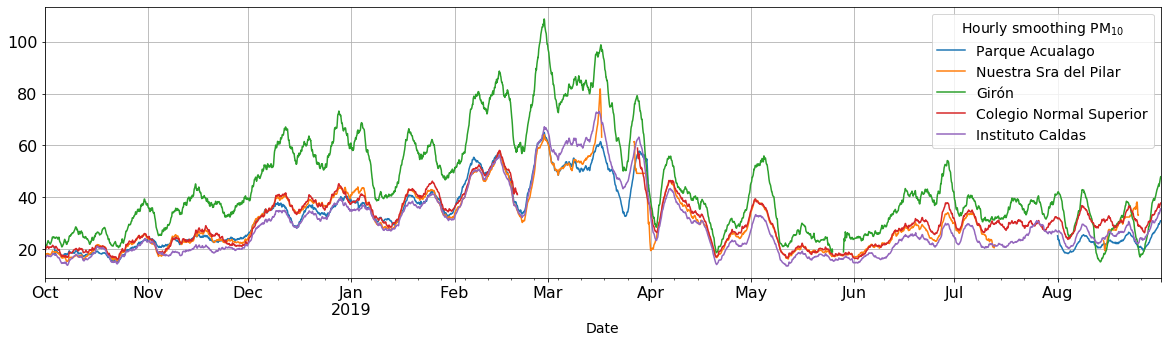

In [43]:
plt.figure(figsize=(20,5))
data_CA_s["A_PM10"].plot(label="Parque Acualago")
data_CA_s["P_PM10"].plot(label="Nuestra Sra del Pilar")
data_CA_s["G_PM10"].plot(label="Girón")
data_CA_s["N_PM10"].plot(label="Colegio Normal Superior")
data_CA_s["C_PM10"].plot(label="Instituto Caldas")
plt.legend(title=r"Hourly smoothing PM$_{10}$",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

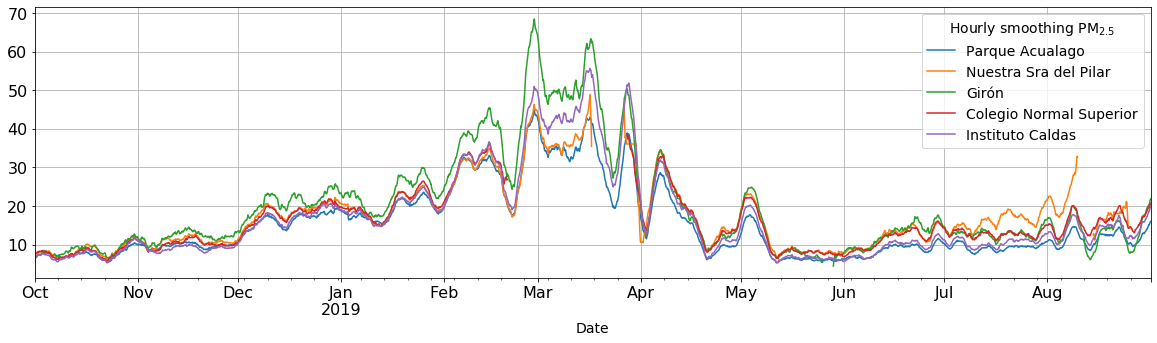

In [34]:
plt.figure(figsize=(20,5))
data_CA_s["A_PM25"].plot(label="Parque Acualago")
data_CA_s["P_PM25"].plot(label="Nuestra Sra del Pilar")
data_CA_s["G_PM25"].plot(label="Girón")
data_CA_s["N_PM25"].plot(label="Colegio Normal Superior")
data_CA_s["C_PM25"].plot(label="Instituto Caldas")
plt.legend(title=r"Hourly smoothing PM$_{2.5}$",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

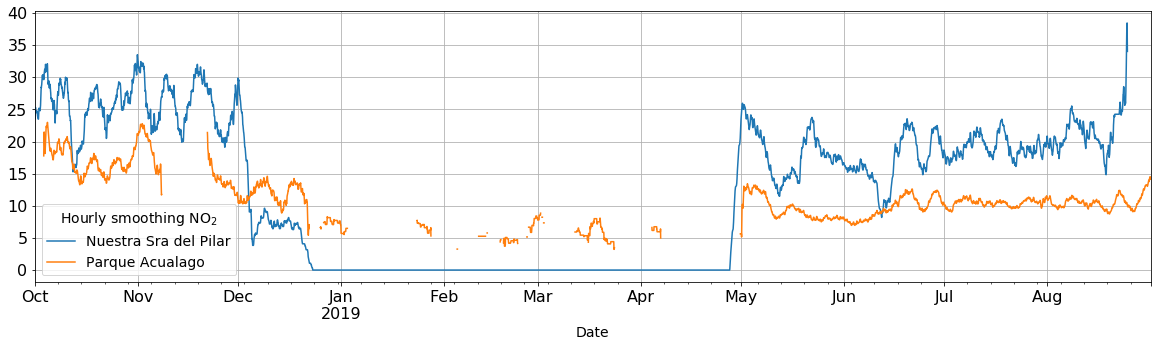

In [35]:
plt.figure(figsize=(20,5))
data_CA_s["P_NO2"].plot(label="Nuestra Sra del Pilar")
data_CA_s["A_NO2"].plot(label="Parque Acualago")
plt.legend(title=r"Hourly smoothing NO$_{2}$",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

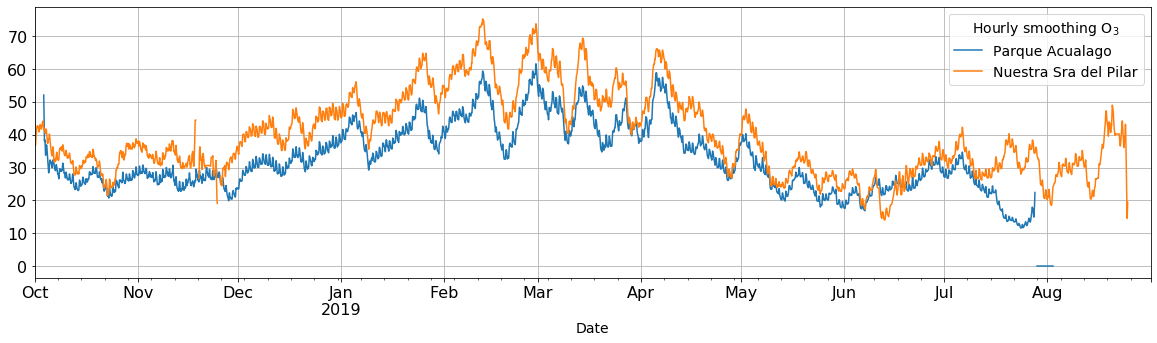

In [36]:
plt.figure(figsize=(20,5))
data_CA_s["A_O3"].plot(label="Parque Acualago")
data_CA_s["P_O3"].plot(label="Nuestra Sra del Pilar")
plt.legend(title=r"Hourly smoothing O$_{3}$",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

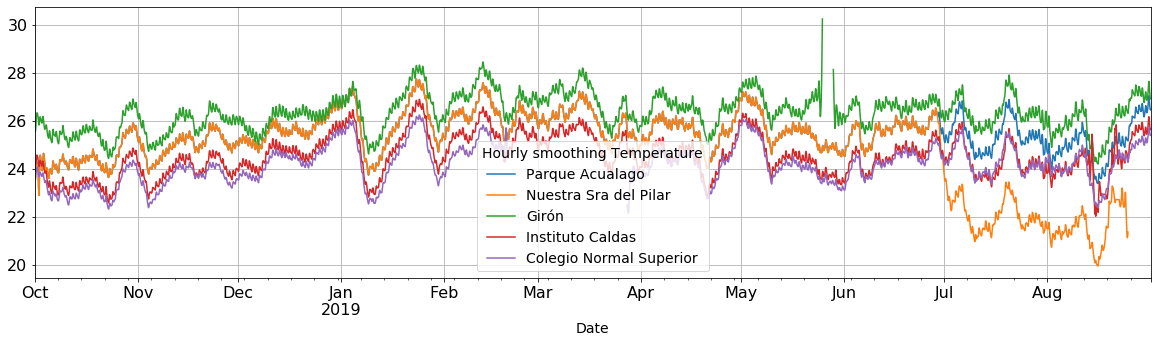

In [37]:
plt.figure(figsize=(20,5))
data_MET_s["A_T"].plot(label="Parque Acualago")
data_MET_s["P_T"].plot(label="Nuestra Sra del Pilar")
data_MET_s["G_T"].plot(label="Girón")
data_MET_s["C_T"].plot(label="Instituto Caldas")
data_MET_s["N_T"].plot(label="Colegio Normal Superior")
plt.legend(title="Hourly smoothing Temperature",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()